In [2]:
# !pip install geopy

In [245]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import distance

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score # cross validation with K fold,used in logistic regresion
import time  # to estimate time of processing-used in GridSearchCV

In [2]:
# Read the Data from the CSV, pandas forms dataframe by default.
cabs=pd.read_csv('YourCabs_training.csv')
cabs.head(10)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0


In [3]:
print('Shape of the data frame: ', cabs.shape)  #print shape of dataset, number of rows and columns
print('\n')
temp=cabs.columns.values  #values give the column names as an array
print('Features of the data frame:\n', temp)

print('\n')
cabs.info() #shows datatype and null values present for all columns

Shape of the data frame:  (43431, 19)


Features of the data frame:
 ['id' 'user_id' 'vehicle_model_id' 'package_id' 'travel_type_id'
 'from_area_id' 'to_area_id' 'from_city_id' 'to_city_id' 'from_date'
 'to_date' 'online_booking' 'mobile_site_booking' 'booking_created'
 'from_lat' 'from_long' 'to_lat' 'to_long' 'Car_Cancellation']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   

In [12]:
cabs['vehicle_model_id'].value_counts()/(cabs['vehicle_model_id'].value_counts().sum())

12    0.733554
85    0.055421
89    0.055053
65    0.044024
28    0.039189
24    0.034399
87    0.013009
90    0.007184
23    0.006838
86    0.002832
10    0.002395
64    0.001957
54    0.001681
17    0.000921
91    0.000576
30    0.000322
36    0.000207
13    0.000161
1     0.000046
43    0.000046
72    0.000046
14    0.000023
76    0.000023
75    0.000023
39    0.000023
70    0.000023
69    0.000023
Name: vehicle_model_id, dtype: float64

In [ ]:
# 73 % of 'vehicle_model_id' feature is 12

In [21]:
cabs['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [11]:
cabs['travel_type_id'].value_counts()/(cabs['travel_type_id'].value_counts().sum())

2    0.789574
3    0.173839
1    0.036587
Name: travel_type_id, dtype: float64

78% of 'travel_type_id' is 2 so lets filter the whole data for travel_type_id==2

In [16]:
filter_cabs=cabs[cabs['travel_type_id']==2]
filter_cabs.shape

(34292, 19)

In [19]:
# On the filtere data we can check for the other feature and can drop irrelevant features
filter_cabs['vehicle_model_id'].value_counts()/(filter_cabs['vehicle_model_id'].value_counts().sum())

12    0.747375
85    0.059547
89    0.057331
28    0.042080
24    0.037939
65    0.025749
90    0.008486
23    0.007524
87    0.004637
86    0.002974
10    0.002450
64    0.002304
17    0.000787
91    0.000729
1     0.000058
54    0.000029
Name: vehicle_model_id, dtype: float64

In [ ]:
# 'vehicle_model_id' can be dropped, can be considered as constant column

In [27]:
filter_cabs.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [31]:
cleaned_cabs=filter_cabs.drop(columns=['id','user_id','vehicle_model_id','package_id','travel_type_id','from_city_id', 'to_city_id', 'to_date'],axis=1)

cleaned_cabs.shape

In [34]:
cleaned_cabs['from_area_id'].nunique()

586

In [35]:
cleaned_cabs['to_area_id'].nunique()

567

**Transformations**

Transform from_area_id to bins of High Med low

In [38]:
#understanding booking features 'online_booking' and 'mobile_site_booking'

print(cleaned_cabs['online_booking'].value_counts())
print(cleaned_cabs['mobile_site_booking'].value_counts())

0    21842
1    12450
Name: online_booking, dtype: int64
0    32643
1     1649
Name: mobile_site_booking, dtype: int64


'online_booking': 12450 customers done booking through online. while 21842 used some other mediun like customer care, mobile.
'mobile_site_booking': 1649 booked by mobile_site while remaining done through some other way.

Basically, from all the area_id booking is performed by some means.

In [37]:
cleaned_cabs['from_area_id'] = cleaned_cabs['from_area_id'].astype('str')  # since IDs present converting them to str

In [40]:
print(cleaned_cabs.groupby('from_area_id')['online_booking'].value_counts())

print(cleaned_cabs.groupby('from_area_id')['mobile_site_booking'].value_counts())
# count or frequency of booking from each area_id is same if we take by 'online_booking' or 'mobile_site_booking'.

from_area_id  online_booking
1004.0        0                  2
              1                  1
1005.0        1                 24
              0                 20
1008.0        1                 16
                                ..
990.0         0                  6
              1                  4
994.0         0                 22
              1                 18
995.0         0                 10
Name: online_booking, Length: 1087, dtype: int64
from_area_id  mobile_site_booking
1004.0        0                       2
              1                       1
1005.0        0                      40
              1                       4
1008.0        0                      19
                                     ..
990.0         0                       7
              1                       3
994.0         0                      40
995.0         0                       9
              1                       1
Name: mobile_site_booking, Length: 920, dtype: int64


In [81]:
# we can group from_area_id based on booking
cleaned_cabs['fromarea_booking_volume']= pd.DataFrame(cleaned_cabs.groupby('from_area_id')['mobile_site_booking'].transform('size'))                         


In [82]:
cleaned_cabs['fromarea_booking_volume']

0         556
1         557
2          95
3         272
4         198
         ... 
43425     798
43426     110
43427    3375
43429      64
43430     283
Name: fromarea_booking_volume, Length: 34292, dtype: int64

In [83]:
cleaned_cabs['fromarea_booking_volume']

0         556
1         557
2          95
3         272
4         198
         ... 
43425     798
43426     110
43427    3375
43429      64
43430     283
Name: fromarea_booking_volume, Length: 34292, dtype: int64

In [90]:
pd.qcut(cleaned_cabs['fromarea_booking_volume'],3)

0        (272.0, 3375.0]
1        (272.0, 3375.0]
2          (0.999, 96.0]
3          (96.0, 272.0]
4          (96.0, 272.0]
              ...       
43425    (272.0, 3375.0]
43426      (96.0, 272.0]
43427    (272.0, 3375.0]
43429      (0.999, 96.0]
43430    (272.0, 3375.0]
Name: fromarea_booking_volume, Length: 34292, dtype: category
Categories (3, interval[float64]): [(0.999, 96.0] < (96.0, 272.0] < (272.0, 3375.0]]

In [85]:
pd.qcut(cleaned_cabs['fromarea_booking_volume'].rank(method='first'),3,labels=['from_low_book','from_medium_book','from_high_book'])

0          from_high_book
1          from_high_book
2           from_low_book
3        from_medium_book
4        from_medium_book
               ...       
43425      from_high_book
43426    from_medium_book
43427      from_high_book
43429       from_low_book
43430      from_high_book
Name: fromarea_booking_volume, Length: 34292, dtype: category
Categories (3, object): ['from_low_book' < 'from_medium_book' < 'from_high_book']

In [91]:
cleaned_cabs['fromarea_booking_volume_density']= pd.qcut(cleaned_cabs['fromarea_booking_volume'].rank(method='first'),3,labels=['from_low_book','from_medium_book','from_high_book'])                         
cleaned_cabs.head(5)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume,fromarea_booking_volume_density,toarea_booking_volume,toarea_booking_volume_density,fromarea_cancel_volume,fromarea_cancel_volume_density,toarea_cancel_volume,toarea_cancel_volume_density
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,556,from_high_book,126,to_medium_book,556,from_high_cancel,126,to_medium_cancel
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,557,from_high_book,46,to_low_book,557,from_high_cancel,46,to_low_cancel
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,95,from_low_book,49,to_low_book,95,from_low_cancel,49,to_low_cancel
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,272,from_medium_book,9,to_low_book,272,from_medium_cancel,9,to_low_cancel
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,198,from_medium_book,94,to_low_book,198,from_medium_cancel,94,to_low_cancel


In [92]:
# we can group to_area_id based on booking
cleaned_cabs['toarea_booking_volume']= pd.DataFrame(cleaned_cabs.groupby('to_area_id')['mobile_site_booking'].transform('size'))                         
cleaned_cabs['toarea_booking_volume']

0         126
1          46
2          49
3           9
4          94
         ... 
43425      10
43426     330
43427      55
43429      96
43430    8777
Name: toarea_booking_volume, Length: 34292, dtype: int64

In [93]:
pd.qcut(cleaned_cabs['toarea_booking_volume'].rank(method='first'),3,labels=['to_low_book','to_medium_book','to_high_book'])

0        to_medium_book
1           to_low_book
2           to_low_book
3           to_low_book
4           to_low_book
              ...      
43425       to_low_book
43426    to_medium_book
43427       to_low_book
43429       to_low_book
43430      to_high_book
Name: toarea_booking_volume, Length: 34292, dtype: category
Categories (3, object): ['to_low_book' < 'to_medium_book' < 'to_high_book']

In [94]:
cleaned_cabs['toarea_booking_volume_density']= pd.qcut(cleaned_cabs['toarea_booking_volume'].rank(method='first'),3,labels=['to_low_book','to_medium_book','to_high_book'])                         
cleaned_cabs.head(5)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume,fromarea_booking_volume_density,toarea_booking_volume,toarea_booking_volume_density,fromarea_cancel_volume,fromarea_cancel_volume_density,toarea_cancel_volume,toarea_cancel_volume_density
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,556,from_high_book,126,to_medium_book,556,from_high_cancel,126,to_medium_cancel
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,557,from_high_book,46,to_low_book,557,from_high_cancel,46,to_low_cancel
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,95,from_low_book,49,to_low_book,95,from_low_cancel,49,to_low_cancel
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,272,from_medium_book,9,to_low_book,272,from_medium_cancel,9,to_low_cancel
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,198,from_medium_book,94,to_low_book,198,from_medium_cancel,94,to_low_cancel


In [95]:
# we can group from_area_id based on car_cancellation
cleaned_cabs['fromarea_cancel_volume']= pd.DataFrame(cleaned_cabs.groupby('from_area_id')['Car_Cancellation'].transform('size'))                         
cleaned_cabs['fromarea_cancel_volume']

0         556
1         557
2          95
3         272
4         198
         ... 
43425     798
43426     110
43427    3375
43429      64
43430     283
Name: fromarea_cancel_volume, Length: 34292, dtype: int64

In [1]:
# (cleaned_cabs.groupby('from_area_id')['Car_Cancellation'].sum()*100)/(cleaned_cabs.groupby('from_area_id')['Car_Cancellation'].count())

In [97]:
cleaned_cabs['fromarea_cancel_volume_density']=pd.qcut(cleaned_cabs['fromarea_cancel_volume'].rank(method='first'),3,labels=['from_low_cancel','from_medium_cancel','from_high_cancel'])
cleaned_cabs.head(3)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume,fromarea_booking_volume_density,toarea_booking_volume,toarea_booking_volume_density,fromarea_cancel_volume,fromarea_cancel_volume_density,toarea_cancel_volume,toarea_cancel_volume_density
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,556,from_high_book,126,to_medium_book,556,from_high_cancel,126,to_medium_cancel
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,557,from_high_book,46,to_low_book,557,from_high_cancel,46,to_low_cancel
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,95,from_low_book,49,to_low_book,95,from_low_cancel,49,to_low_cancel


In [98]:
# we can group to_area_id based on car_cancellation
cleaned_cabs['toarea_cancel_volume']= pd.DataFrame(cleaned_cabs.groupby('to_area_id')['Car_Cancellation'].transform('size'))                         
cleaned_cabs['toarea_cancel_volume']

0         126
1          46
2          49
3           9
4          94
         ... 
43425      10
43426     330
43427      55
43429      96
43430    8777
Name: toarea_cancel_volume, Length: 34292, dtype: int64

In [99]:
cleaned_cabs['toarea_cancel_volume_density']=pd.qcut(cleaned_cabs['toarea_cancel_volume'].rank(method='first'),3,labels=['to_low_cancel','to_medium_cancel','to_high_cancel'])
cleaned_cabs.head(3)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume,fromarea_booking_volume_density,toarea_booking_volume,toarea_booking_volume_density,fromarea_cancel_volume,fromarea_cancel_volume_density,toarea_cancel_volume,toarea_cancel_volume_density
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,556,from_high_book,126,to_medium_book,556,from_high_cancel,126,to_medium_cancel
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,557,from_high_book,46,to_low_book,557,from_high_cancel,46,to_low_cancel
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,95,from_low_book,49,to_low_book,95,from_low_cancel,49,to_low_cancel


In [100]:
cleaned_cabs_drp=cleaned_cabs.drop(columns=['from_area_id','to_area_id','fromarea_booking_volume','toarea_booking_volume','fromarea_cancel_volume','toarea_cancel_volume'],axis=1)

In [101]:
cleaned_cabs_drp.head(5)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,from_high_book,to_medium_book,from_high_cancel,to_medium_cancel
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel


In [102]:
cleaned_cabs_drp.shape

(34292, 13)

**Tranformation of 'from_date' feature and 'booking_created'**

we can get four columns - month, day of the week, weekend/weekday and time category- morning(6am-12pm)/afternoon(12pm-6pm)/evening(6pm-12am)/midnight(12am-6am).

Taking details from 'booking_created' we can make one more column 'time difference' btw booking created and trip start time. 

In [185]:
cleaned_cabs_drp['from_date_dt'] = pd.to_datetime(cleaned_cabs_drp['from_date'])

In [186]:
cleaned_cabs_drp['from_date_dt']

0       2013-01-01 02:00:00
1       2013-01-01 09:00:00
2       2013-01-01 03:30:00
3       2013-01-01 05:45:00
4       2013-01-01 09:00:00
                ...        
43425   2013-11-25 00:00:00
43426   2013-11-24 18:00:00
43427   2013-11-26 01:00:00
43429   2013-11-24 16:00:00
43430   2013-11-25 05:00:00
Name: from_date_dt, Length: 34292, dtype: datetime64[ns]

In [187]:
time = cleaned_cabs_drp['from_date_dt'].dt.hour
time

0         2
1         9
2         3
3         5
4         9
         ..
43425     0
43426    18
43427     1
43429    16
43430     5
Name: from_date_dt, Length: 34292, dtype: int64

In [188]:
cond = [(cleaned_cabs_drp['from_date_dt'].dt.hour.between(0,6)),
        (cleaned_cabs_drp['from_date_dt'].dt.hour.between(6,12)),(
        cleaned_cabs_drp['from_date_dt'].dt.hour.between(12,18)),(
        cleaned_cabs_drp['from_date_dt'].dt.hour.between(18,24))]

labels = ['Earlymorning','Morning','Afternoon','Evening']



cleaned_cabs_drp['Time_category'] = np.select(cond,labels)

In [165]:
cleaned_cabs_drp['day_of_week'] = cleaned_cabs_drp['from_date_dt'].dt.day_name()

In [189]:
cleaned_cabs_drp['weekday'] = np.where((days == 'Saturday') | (days == 'Sunday'),'Weekend','Weekday')
cleaned_cabs_drp['weekday']

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
43425    Weekday
43426    Weekend
43427    Weekday
43429    Weekend
43430    Weekday
Name: weekday, Length: 34292, dtype: object

In [191]:
cleaned_cabs_drp['month'] = cleaned_cabs_drp['from_date_dt'].dt.month_name()

In [192]:
cleaned_cabs_drp['booking_created_dt'] = pd.to_datetime(cleaned_cabs_drp['booking_created'])

In [193]:
tripdate=cleaned_cabs_drp['from_date_dt'].dt.day

In [194]:
bookdate=cleaned_cabs_drp['booking_created_dt'].dt.day

In [195]:
cleaned_cabs_drp.loc[tripdate!=bookdate]

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density,from_date_dt,Time_category,weekday,booking_created_dt,month
15,1/2/2013 2:00,0,0,1/1/2013 11:52,12.936520,77.544810,12.939440,77.629230,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,2013-01-02 02:00:00,Earlymorning,Weekday,2013-01-01 11:52:00,January
16,1/2/2013 0:30,1,0,1/1/2013 12:14,12.908993,77.688900,13.199560,77.706880,0,from_low_book,to_high_book,from_low_cancel,to_high_cancel,2013-01-02 00:30:00,Earlymorning,Weekday,2013-01-01 12:14:00,January
26,1/2/2013 20:00,0,0,1/1/2013 15:02,13.199560,77.706880,12.962980,77.712290,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,2013-01-02 20:00:00,Evening,Weekday,2013-01-01 15:02:00,January
30,1/2/2013 7:00,0,0,1/1/2013 15:39,12.815750,77.684650,13.044009,77.606805,0,from_low_book,to_medium_book,from_low_cancel,to_medium_cancel,2013-01-02 07:00:00,Morning,Weekday,2013-01-01 15:39:00,January
32,1/2/2013 8:00,0,0,1/1/2013 17:16,13.059784,77.609219,12.966910,77.749350,0,from_low_book,to_medium_book,from_low_cancel,to_medium_cancel,2013-01-02 08:00:00,Morning,Weekday,2013-01-01 17:16:00,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43419,11/25/2013 4:30,0,0,11/24/2013 13:47,12.951850,77.696420,13.199560,77.706880,0,from_high_book,to_high_book,from_high_cancel,to_high_cancel,2013-11-25 04:30:00,Earlymorning,Weekday,2013-11-24 13:47:00,November
43421,11/25/2013 9:45,0,0,11/24/2013 14:10,13.000418,77.674835,12.978960,77.673450,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,2013-11-25 09:45:00,Morning,Weekday,2013-11-24 14:10:00,November
43425,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,2013-11-25 00:00:00,Earlymorning,Weekday,2013-11-24 14:24:00,November
43427,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,2013-11-26 01:00:00,Earlymorning,Weekday,2013-11-24 14:30:00,November


In [196]:
# time difference between the booking and travel time
cleaned_cabs_drp['time_difference']=(cleaned_cabs_drp['from_date_dt'].dt.hour)+(((tripdate-bookdate)*24)-cleaned_cabs_drp['booking_created_dt'].dt.hour)

In [198]:
cleaned_cabs_drp.head(5)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density,from_date_dt,Time_category,weekday,booking_created_dt,month,time_difference
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,from_high_book,to_medium_book,from_high_cancel,to_medium_cancel,2013-01-01 02:00:00,Earlymorning,Weekday,2013-01-01 01:39:00,January,1
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,2013-01-01 09:00:00,Morning,Weekday,2013-01-01 02:25:00,January,7
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,2013-01-01 03:30:00,Earlymorning,Weekday,2013-01-01 03:08:00,January,0
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,2013-01-01 05:45:00,Earlymorning,Weekday,2013-01-01 04:39:00,January,1
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,2013-01-01 09:00:00,Morning,Weekday,2013-01-01 07:53:00,January,2


In [203]:
cleaned_cabs_drp1=cleaned_cabs_drp.drop(columns=['from_date','booking_created','from_date_dt','booking_created_dt'],axis=1)
cleaned_cabs_drp1

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density,Time_category,weekday,month,time_difference
0,0,0,12.924150,77.672290,12.927320,77.635750,0,from_high_book,to_medium_book,from_high_cancel,to_medium_cancel,Earlymorning,Weekday,January,1
1,0,0,12.966910,77.749350,12.927680,77.626640,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Morning,Weekday,January,7
2,0,0,12.937222,77.626915,13.047926,77.597766,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,Earlymorning,Weekday,January,0
3,0,0,12.989990,77.553320,12.971430,77.639140,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Earlymorning,Weekday,January,1
4,0,0,12.845653,77.677925,12.954340,77.600720,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Morning,Weekday,January,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,12.976770,77.572700,13.015080,77.677960,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Earlymorning,Weekday,November,10
43426,1,0,13.030640,77.649100,12.952780,77.590880,0,from_medium_book,to_medium_book,from_medium_cancel,to_medium_cancel,Afternoon,Weekend,November,4
43427,1,0,13.199560,77.706880,13.017436,77.644580,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Earlymorning,Weekday,November,35
43429,0,0,12.968970,77.594560,12.938230,77.622890,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,Afternoon,Weekend,November,2


**Transformation of latitude/longitude to distance between from and to area**

In [209]:
def cal_distance(from_lat,from_long,to_lat,to_long):
      return distance((from_lat,from_long),(to_lat,to_long)).km

In [213]:
cleaned_cabs_drp1['distance'] = np.round(cleaned_cabs_drp1.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1),2)

In [215]:
cleaned_cabs_drp2=cleaned_cabs_drp1.drop(columns=['from_lat','from_long','to_lat','to_long'],axis=1)

In [216]:
cleaned_cabs_drp2

,online_booking,mobile_site_booking,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density,Time_category,weekday,month,time_difference,distance
0,0,0,0,from_high_book,to_medium_book,from_high_cancel,to_medium_cancel,Earlymorning,Weekday,January,1,3.98
1,0,0,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Morning,Weekday,January,7,14.00
2,0,0,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,Earlymorning,Weekday,January,0,12.65
3,0,0,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Earlymorning,Weekday,January,1,9.53
4,0,0,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Morning,Weekday,January,2,14.66
...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Earlymorning,Weekday,November,10,12.18
43426,1,0,0,from_medium_book,to_medium_book,from_medium_cancel,to_medium_cancel,Afternoon,Weekend,November,4,10.68
43427,1,0,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Earlymorning,Weekday,November,35,21.25
43429,0,0,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,Afternoon,Weekend,November,2,4.58


In [217]:
cleaned_cabs_drp2['distance'].describe()

count    34292.000000
mean        17.321886
std         10.412192
min          0.000000
25%          8.550000
50%         14.655000
75%         26.180000
max         59.540000
Name: distance, dtype: float64

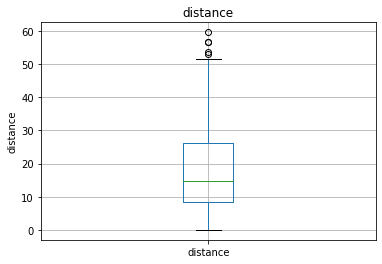

In [218]:
cleaned_cabs_drp2.boxplot(column='distance')
plt.ylabel('distance')
plt.title('distance')
plt.show()

In [235]:
Q1=cleaned_cabs_drp2['distance'].quantile(0.25)
Q3=cleaned_cabs_drp2['distance'].quantile(0.75)
IQR=Q3-Q1
outHQ=cleaned_cabs_drp2['distance'].quantile(0.85)
outLQ=cleaned_cabs_drp2['distance'].quantile(0.05)
        
print('Selected border(5% to 85 %): ',np.round(outLQ,2),'to', np.round(outHQ,2))
print('IQR = ', Q1, 'to', Q3)
outpercH = ((len(cleaned_cabs_drp2.loc[cleaned_cabs_drp2['distance']>outHQ]))/(len(cleaned_cabs_drp2['distance'])))*100
outpercL = ((len(cleaned_cabs_drp2.loc[cleaned_cabs_drp2['distance']<outLQ]))/(len(cleaned_cabs_drp2['distance'])))*100

print('Percentage of outliers below:', np.round(outpercL,2), '%','above: ',np.round(outpercH,2), '%')
    

Selected border(5% to 85 %):  3.6 to 30.31
IQR =  8.55 to 26.18
Percentage of outliers below: 0.0 % above:  0.0 %


In [236]:
a=np.round(outHQ,2) 
b=np.round(outLQ,2) 
cleaned_cabs_drp2['distance'] = np.where(cleaned_cabs_drp2['distance'] > a, a,cleaned_cabs_drp2['distance'])
cleaned_cabs_drp2['distance'] = np.where(cleaned_cabs_drp2['distance'] < b, b,cleaned_cabs_drp2['distance'])

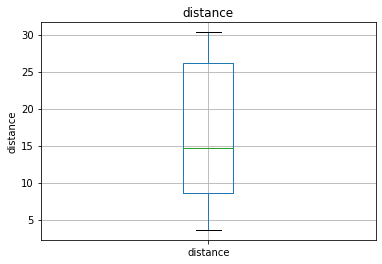

In [237]:
cleaned_cabs_drp2.boxplot(column='distance')
plt.ylabel('distance')
plt.title('distance')
plt.show()

In [238]:
cleaned_cabs_drp2['distance'].describe()

count    34292.000000
mean        16.760819
std          9.295097
min          3.600000
25%          8.550000
50%         14.655000
75%         26.180000
max         30.310000
Name: distance, dtype: float64

In [240]:
final_cab=cleaned_cabs_drp2.copy()

In [241]:
final_cab.head(5)

,online_booking,mobile_site_booking,Car_Cancellation,fromarea_booking_volume_density,toarea_booking_volume_density,fromarea_cancel_volume_density,toarea_cancel_volume_density,Time_category,weekday,month,time_difference,distance
0,0,0,0,from_high_book,to_medium_book,from_high_cancel,to_medium_cancel,Earlymorning,Weekday,January,1,3.98
1,0,0,0,from_high_book,to_low_book,from_high_cancel,to_low_cancel,Morning,Weekday,January,7,14.00
2,0,0,0,from_low_book,to_low_book,from_low_cancel,to_low_cancel,Earlymorning,Weekday,January,0,12.65
3,0,0,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Earlymorning,Weekday,January,1,9.53
4,0,0,0,from_medium_book,to_low_book,from_medium_cancel,to_low_cancel,Morning,Weekday,January,2,14.66


In [242]:
# final data info after all cleaning and transformation steps
final_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   online_booking                   34292 non-null  int64   
 1   mobile_site_booking              34292 non-null  int64   
 2   Car_Cancellation                 34292 non-null  int64   
 3   fromarea_booking_volume_density  34292 non-null  category
 4   toarea_booking_volume_density    34292 non-null  category
 5   fromarea_cancel_volume_density   34292 non-null  category
 6   toarea_cancel_volume_density     34292 non-null  category
 7   Time_category                    34292 non-null  object  
 8   weekday                          34292 non-null  object  
 9   month                            34292 non-null  object  
 10  time_difference                  34292 non-null  int64   
 11  distance                         34292 non-null  float64 
dtypes: c

In [294]:
final_cab.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'fromarea_booking_volume_density', 'toarea_booking_volume_density',
       'fromarea_cancel_volume_density', 'toarea_cancel_volume_density',
       'Time_category', 'weekday', 'month', 'time_difference', 'distance'],
      dtype='object')

In [297]:

one_hot_encoded_cab = pd.get_dummies(final_cab, columns = ['fromarea_booking_volume_density', 'toarea_booking_volume_density','fromarea_cancel_volume_density',
                                                          'toarea_cancel_volume_density','Time_category','weekday','month'])
(one_hot_encoded_cab)

,online_booking,mobile_site_booking,Car_Cancellation,time_difference,distance,fromarea_booking_volume_density_from_low_book,fromarea_booking_volume_density_from_medium_book,fromarea_booking_volume_density_from_high_book,toarea_booking_volume_density_to_low_book,toarea_booking_volume_density_to_medium_book,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,0,1,3.98,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,7,14.00,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,12.65,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,9.53,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,2,14.66,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,0,10,12.18,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
43426,1,0,0,4,10.68,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43427,1,0,0,35,21.25,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
43429,0,0,0,2,4.58,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Feature selection**

It mainly includes the correlation check between features and highly correlated features can be eliminated before modeling. As well, zero variance check is done to exclude constant columns.


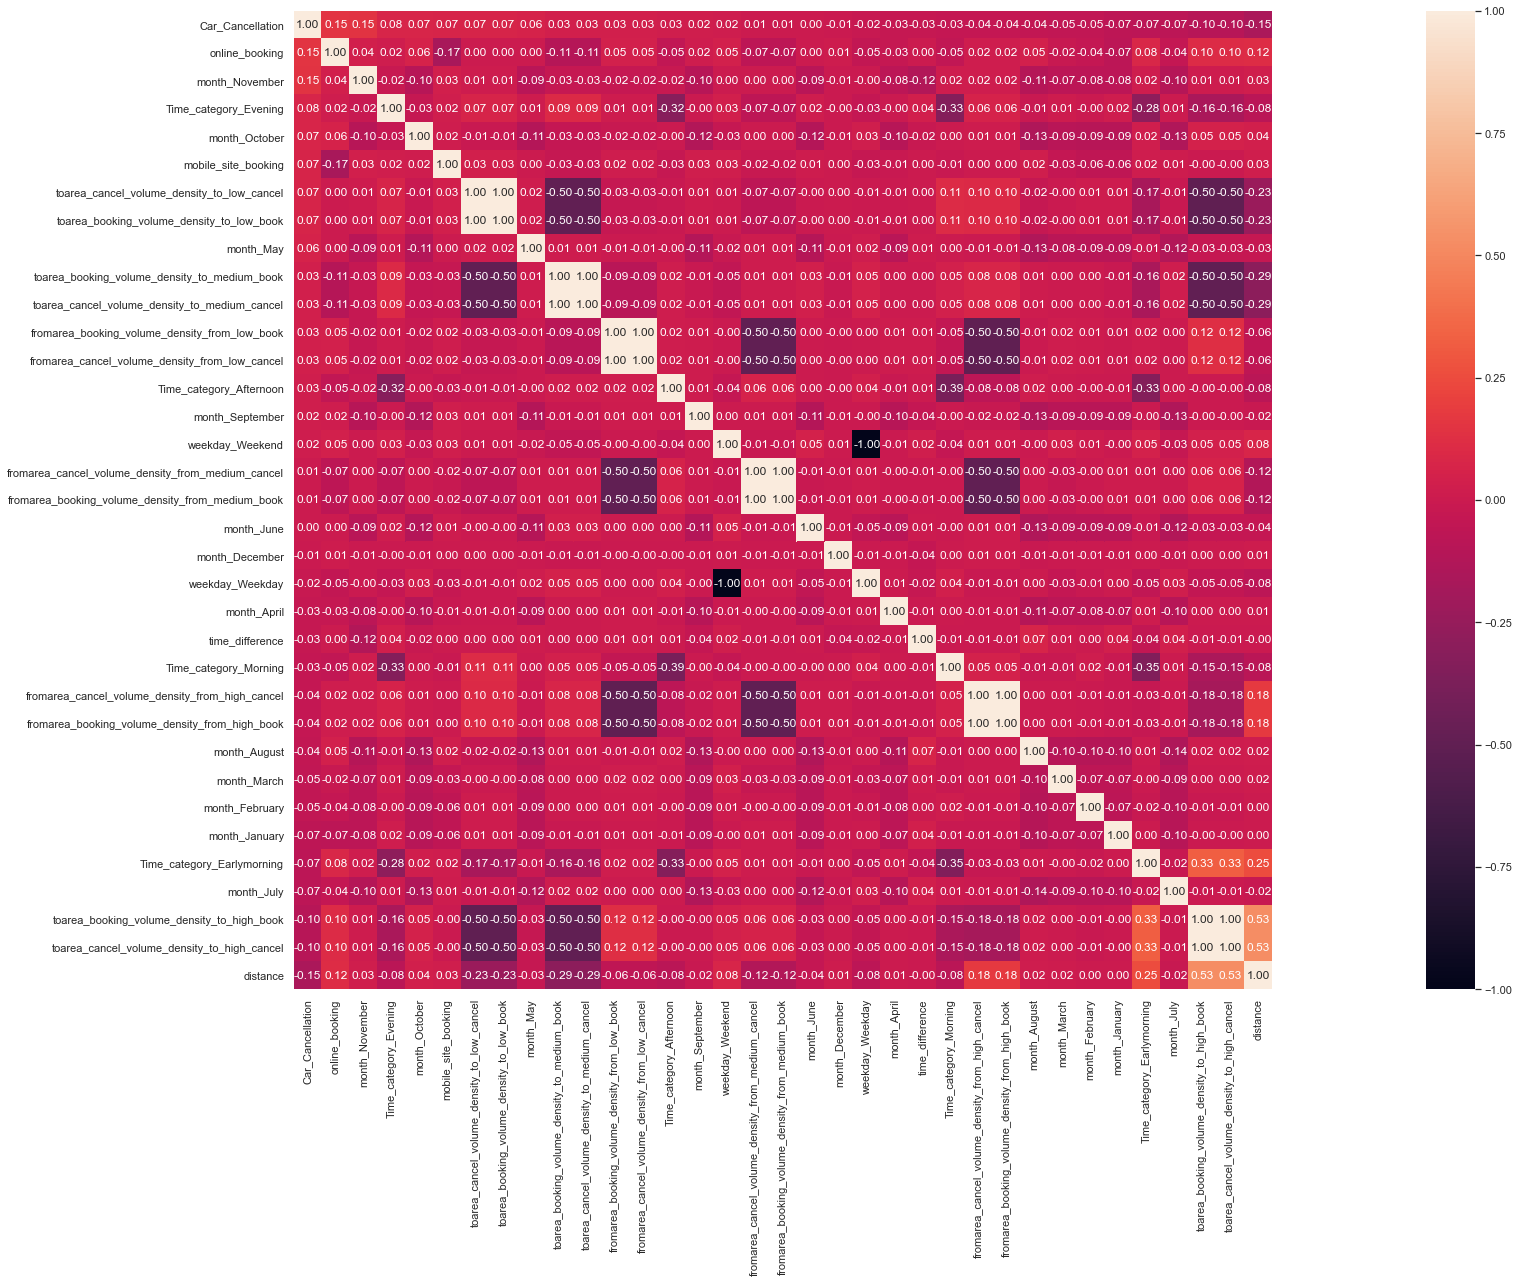

In [298]:
#Car_Cancellation_ correlation matrix
plt.figure(figsize=(55,18))
corrmat=one_hot_encoded_cab.corr()
k=35   #number of variables for heatmap
cols=corrmat.nlargest(k,'Car_Cancellation')['Car_Cancellation'].index
cm=np.corrcoef(one_hot_encoded_cab[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=cols.values, xticklabels=cols.values)

In [299]:
one_hot_encoded_cab.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'time_difference', 'distance',
       'fromarea_booking_volume_density_from_low_book',
       'fromarea_booking_volume_density_from_medium_book',
       'fromarea_booking_volume_density_from_high_book',
       'toarea_booking_volume_density_to_low_book',
       'toarea_booking_volume_density_to_medium_book',
       'toarea_booking_volume_density_to_high_book',
       'fromarea_cancel_volume_density_from_low_cancel',
       'fromarea_cancel_volume_density_from_medium_cancel',
       'fromarea_cancel_volume_density_from_high_cancel',
       'toarea_cancel_volume_density_to_low_cancel',
       'toarea_cancel_volume_density_to_medium_cancel',
       'toarea_cancel_volume_density_to_high_cancel',
       'Time_category_Afternoon', 'Time_category_Earlymorning',
       'Time_category_Evening', 'Time_category_Morning', 'weekday_Weekday',
       'weekday_Weekend', 'month_April', 'month_August', 'month_December',
       'm

*No correlation is found between any of the features, however, the 'mobile_site_booking' feature is having variance threshold less than 5%, however, as it is one of the one-hot encoded feature of 'booking'. 

**Data preprocessing**

It includes,

1.Seperaion of independent(predictor) and dependent(target) variables from the dataset.

2.Splitting of the train-test data.

3.Standardization of the data and splitting of train/test dataset.


In [303]:
 # 1. accessing values from all the independent columns to x and the target variable to y seperately
    
x=one_hot_encoded_cab.drop(['Car_Cancellation'],axis=1).values    

y=one_hot_encoded_cab['Car_Cancellation'].values #  only target variable

In [304]:
# Splitting train\test dataset
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42) 

In [305]:
# 3. Scaling/Standardization of the data

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [306]:
#As the data is highly imbalnced, it is better to check the weight of the success/failure after split.    

print("===============TRAIN=================")
print(f"book Rate(car_cancel=0): {sum(y_train==0)/len(y_train) * 100:.2f}%")
print(f"cancel Rate(car_cancel=1): {sum(y_train==1)/len(y_train)* 100 :.2f}%")

print("===============TEST=================")
print(f"book Rate: {sum(y_test==0)/len(y_test) * 100:.2f}%")
print(f"cancel Rate: {sum(y_test==1)/len(y_test)* 100 :.2f}%")

===============TRAIN=================
book Rate(car_cancel=0): 91.83%
cancel Rate(car_cancel=1): 8.17%
===============TEST=================
book Rate: 92.21%
cancel Rate: 7.79%


### Model 1: Logistic Regression

In [307]:
# instantiate the model (using the default parameters)
model_lr = LogisticRegression(random_state=1)
# fit the model with data
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [308]:
y_pred_lr=model_lr.predict(x_test)

In [309]:
difference = pd.DataFrame(y_test - y_pred_lr)
difference.value_counts()

 0    6314
 1     499
-1      46
dtype: int64

**Performance metrics - Logistic Regression**

In [310]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cnf_matrix

array([[6279,   46],
       [ 499,   35]], dtype=int64)

In [311]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))

Accuracy: 0.9205423531126986
Recall: 0.06554307116104868
Precision: 0.43209876543209874


Area Under Curve =  0.825103551390801


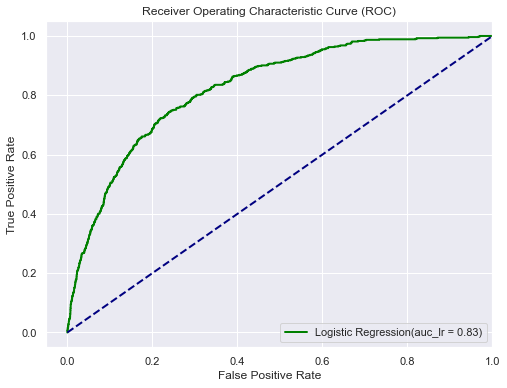

In [312]:
# Area under Curve
y_pred_proba_lr = model_lr.predict_proba(x_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba_lr)
print('Area Under Curve = ', auc_lr)
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',lw=lw, label='Logistic Regression(auc_lr = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc=4)
plt.show()

In [313]:
# cross validation to automatically split, fit, and score; 10 folds selected. No other hyperparameter exists in Logistic regression
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model_auto = LogisticRegression()
results = cross_val_score(model_lr, x, y, cv=kfold)# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 91.82% (0.38%)


### Model 2: Decision Tree Classifier

In [314]:
model_dt_auto = DecisionTreeClassifier(random_state=1)

In [322]:
model_dt_auto.set_params(criterion = 'entropy', max_depth = 17, min_samples_leaf=8, min_samples_split = 150)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=8,
                       min_samples_split=150, random_state=1)

In [323]:
# train the model with optimum parameters
model_dt_auto.fit(x_train,y_train) 
model_dt_auto_score_train = model_dt_auto.score(x_train, y_train)
print("Training score: ",model_dt_auto_score_train)

Training score:  0.9278606058396821


In [324]:
y_pred_auto=model_dt_auto.predict(x_test)

In [325]:
model_dt_auto_score_test = model_dt_auto.score(x_test, y_test)
print("Testing score: ",model_dt_auto_score_test)

Testing score:  0.9298731593526753


In [326]:
y_pred_proba_test_auto = model_dt_auto.predict_proba(x_test)[:, 1]

**Performance metrics**

In [327]:
print(metrics.confusion_matrix(y_test,y_pred_auto))
print('accuracy: ', metrics.accuracy_score(y_test,y_pred_auto))
print('Recall: ', metrics.recall_score(y_test,y_pred_auto))
print("Precision: ", metrics.precision_score(y_test,y_pred_auto))

[[6253   72]
 [ 409  125]]
accuracy:  0.9298731593526753
Recall:  0.2340823970037453
Precision:  0.6345177664974619


In [328]:
# Area under curve with GridSearchCV
y_pred_proba_dt = model_dt_auto.predict_proba(x_test)[::,1]
fpr_auto, tpr_auto,_ = metrics.roc_curve(y_test,y_pred_proba_test_auto)  #how these many values of fpr and tpr from a single set of data are created, 
auc_auto= metrics.roc_auc_score(y_test,y_pred_proba_test_auto)
print('Area Under Curve = ', auc_auto)

Area Under Curve =  0.8495644772098119


Area Under Curve =  0.8495644772098119


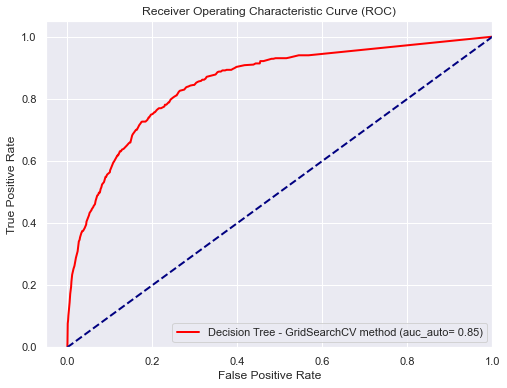

In [329]:
plt.figure(figsize=(8,6))
lw = 2
print('Area Under Curve = ', auc_auto)
plt.plot(fpr_auto, tpr_auto, color='red',lw=lw, label='Decision Tree - GridSearchCV method (auc_auto= %0.2f)' % auc_auto)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc=4)
plt.show()